In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

file_to_open = "C:/Users/igles/Documents/Data Science/1. advStats/Lesson 4 - ANOVAs/avocados.csv"
avocados = pd.read_csv(file_to_open)
avocados.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  12/27/2015          1.33      64236.62  1036.74   54454.85   
1           1  12/20/2015          1.35      54876.98   674.28   44638.81   
2           2  12/13/2015          0.93     118220.22   794.70  109149.67   
3           3   12/6/2015          1.08      78992.15  1132.00   71976.41   
4           4  11/29/2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [2]:
avocados0 = avocados[['region', 'Total Volume']]

In [3]:
regions = ['Indianapolis', 'Orlando','PhoenixTucson']
avocados00 = avocados0['region'].isin(regions)
avocados1 = avocados0[avocados00].copy()
avocados1.head()

region  Total Volume
988  Indianapolis     123096.09
989  Indianapolis     116353.68
990  Indianapolis     125342.89
991  Indianapolis     145740.44
992  Indianapolis     108444.41

In [4]:
avocados1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 988 to 18008
Data columns (total 2 columns):
region          1014 non-null object
Total Volume    1014 non-null float64
dtypes: float64(1), object(1)
memory usage: 23.8+ KB


In [5]:
def recode (series):
    if series == "Indianapolis": 
        return 0
    if series == "Orlando": 
        return 1
    if series == "PhoenixTucson": 
        return 2

avocados1['regionR'] = avocados1['region'].apply(recode)
avocados1.head()

region  Total Volume  regionR
988  Indianapolis     123096.09        0
989  Indianapolis     116353.68        0
990  Indianapolis     125342.89        0
991  Indianapolis     145740.44        0
992  Indianapolis     108444.41        0

In [6]:
avocados2 = avocados1[['regionR','Total Volume']]

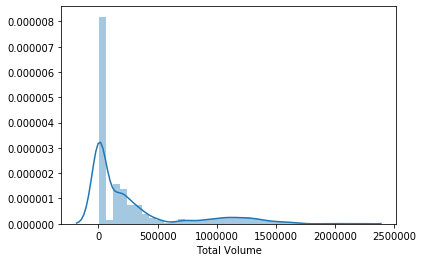

In [7]:
sns.distplot(avocados2['Total Volume'])

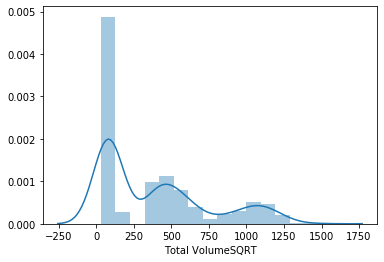

In [8]:
avocados2['Total VolumeSQRT'] = np.sqrt(avocados2['Total Volume'])
sns.distplot(avocados2['Total VolumeSQRT'])

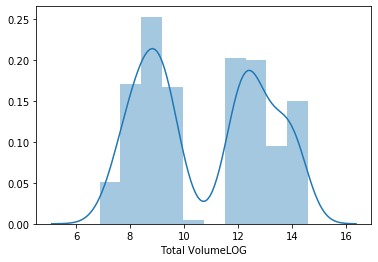

In [14]:
avocados2['Total VolumeLOG'] = np.log(avocados2['Total Volume'])
sns.distplot(avocados2['Total VolumeLOG'])

In [15]:
scipy.stats.bartlett(avocados2['Total VolumeLOG'], avocados2['regionR'])

BartlettResult(statistic=883.7919675933716, pvalue=3.275576009474301e-194)

In [16]:
scipy.stats.fligner(avocados2['Total VolumeLOG'], avocados2['regionR'])

FlignerResult(statistic=1106.1971206828098, pvalue=1.4858650815524343e-242)

In [11]:
stats.f_oneway(avocados['Total Volume'][avocados['region']=='Indianapolis'],
                   avocados['Total Volume'][avocados['region']=='Orlando'],
               avocados['Total Volume'][avocados['region']=='PhoenixTucson'])

F_onewayResult(statistic=174.05378837225294, pvalue=1.101276256457687e-65)

In [17]:
postHoc = MultiComparison(avocados2['Total VolumeLOG'], avocados2['regionR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.4292 0.0253 0.0424  0.816   True
     0      2   1.4766  0.001 1.0898 1.8634   True
     1      2   1.0474  0.001 0.6606 1.4342   True
--------------------------------------------------


In [18]:
avocados2.groupby('regionR').mean()

Total Volume  Total VolumeSQRT  Total VolumeLOG
regionR                                                  
0         89536.661036        240.446599        10.157564
1        173552.378373        324.645892        10.586744
2        578826.368343        585.837880        11.634171